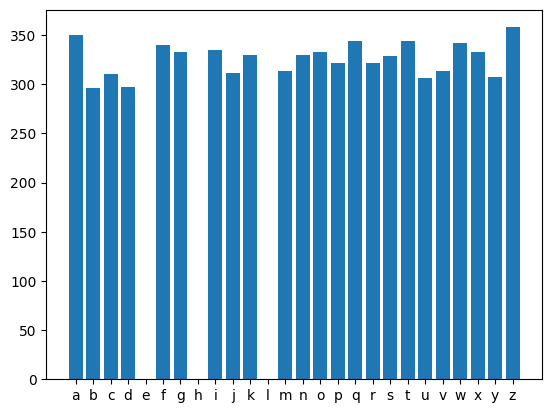

Counter({'z': 358, 'a': 350, 'q': 344, 't': 344, 'w': 342, 'f': 340, 'i': 335, 'g': 333, 'x': 333, 'o': 333, 'k': 330, 'n': 330, 's': 329, 'p': 322, 'r': 322, 'v': 314, 'm': 314, 'j': 311, 'c': 310, 'y': 307, 'u': 306, 'd': 297, 'b': 296})


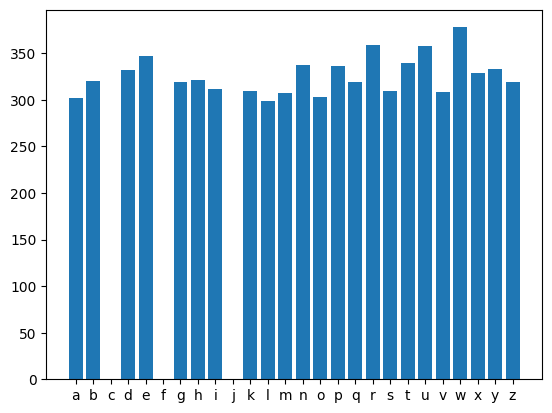

Counter({'w': 378, 'r': 359, 'u': 358, 'e': 347, 't': 340, 'n': 338, 'p': 336, 'y': 333, 'd': 332, 'x': 329, 'h': 321, 'b': 320, 'g': 319, 'q': 319, 'z': 319, 'i': 312, 'k': 310, 's': 310, 'v': 309, 'm': 307, 'o': 303, 'a': 302, 'l': 299})


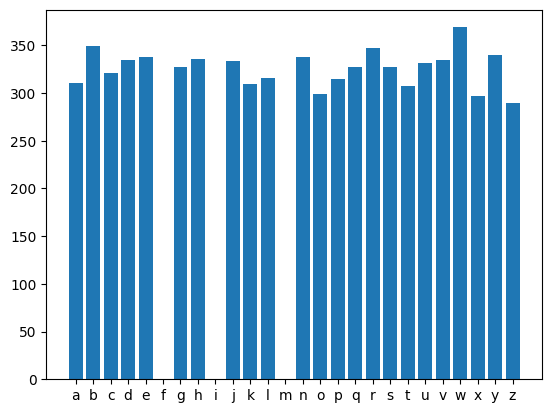

Counter({'w': 369, 'b': 349, 'r': 347, 'y': 340, 'e': 338, 'n': 338, 'h': 336, 'v': 335, 'd': 335, 'j': 334, 'u': 332, 's': 327, 'g': 327, 'q': 327, 'c': 321, 'l': 316, 'p': 315, 'a': 311, 'k': 310, 't': 307, 'o': 299, 'x': 297, 'z': 290})


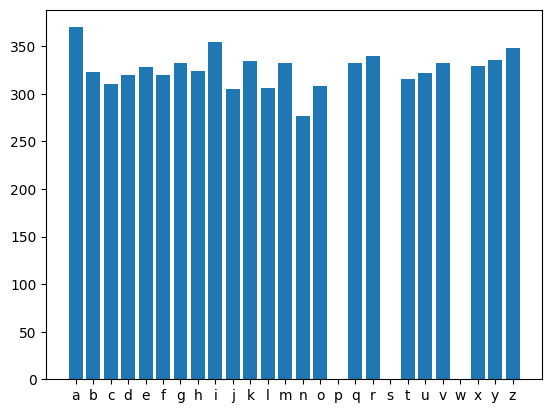

Counter({'a': 370, 'i': 355, 'z': 348, 'r': 340, 'y': 336, 'k': 335, 'm': 332, 'v': 332, 'g': 332, 'q': 332, 'x': 329, 'e': 328, 'h': 324, 'b': 323, 'u': 322, 'd': 320, 'f': 320, 't': 316, 'c': 310, 'o': 308, 'l': 306, 'j': 305, 'n': 277})


In [28]:
import matplotlib.pyplot as plt
import collections


def vignere_encode(plaintext, key):
    plaintext = list(plaintext)
    key = list(key)
    for i in range(len(plaintext)):
        plaintext[i] = ord(plaintext[i]) - 97
        
    for i in range(len(key)):
        key[i] = ord(key[i]) - 97
        
    for i in range(len(plaintext)):
        plaintext[i] = 97 + (plaintext[i] + key[i % len(key)])%26
        
    for i in range(len(plaintext)):
        plaintext[i] = chr(plaintext[i])
    
        
    plaintext = "".join(plaintext)
    return plaintext

    
def vignere_decode(ciphertext, key):
    ciphertext = list(ciphertext)
    key = list(key)
    for i in range(len(ciphertext)):
        ciphertext[i] = ord(ciphertext[i]) - 97
    for i in range(len(key)):
        key[i] = ord(key[i]) - 97
    for i in range(len(ciphertext)):
        ciphertext[i] = 97 + (ciphertext[i] - key[i % len(key)])%26
        
    for i in range(len(ciphertext)):
        ciphertext[i] = chr(ciphertext[i])
    ciphertext = "".join(ciphertext)
    return ciphertext


def estimate_key_length(ciphertext):
    return [4]  # Placeholder for actual estimation method

def frequency_analysis(ciphertext, estimated_key_length):
    segments = [''] * estimated_key_length
    for i, char in enumerate(ciphertext):
        segments[i % estimated_key_length] += char
    key_guess = ''
    for segment in segments:
        plot_frequency_analysis(segment)
        segment_freq = collections.Counter(segment)
        print(segment_freq)
        # total_count = 0
        # for count in segment_freq.values():
        #     total_count += count
        # for letter in segment_freq:
        #     segment_freq[letter] = segment_freq[letter] / total_count * 100
        most_common_char, _ = segment_freq.most_common(1)[0]

        key_guess_char = (ord(most_common_char) - ord('e')) % 26
        key_guess += chr(key_guess_char + 97)

    return key_guess

# plot graph for segment_freq
def plot_frequency_analysis(segment):
    # Frequency analysis for plotting
    letter_counts = collections.Counter(segment)
    letters, counts = zip(*letter_counts.most_common())
    #sort by letter
    letters = [chr(i) for i in range(97, 123)]
    counts = [letter_counts[letter] for letter in letters]
    
    # Plotting
    plt.bar(letters, counts)
    plt.show()

def vignere_crack_kasiski(ciphertext):
    key_guess = frequency_analysis(ciphertext, 4)
    pass


def main():
    
    # part 1, encode and decode
    plaintext = ""
    key = "true"
    fin = open("input.txt", "r")
    for line in fin:
        plaintext += line.strip()
    fin.close()
    
    ciphertext = vignere_encode(plaintext, key)
    plaintext_decoded = vignere_decode(ciphertext, key)

    
    to_write = ""
    for i in range(0, len(plaintext_decoded), 5):
        to_write += plaintext_decoded[i:i+5] + " "

    fout = open("output.txt", "w")
    fout.write(to_write)
    fout.close()
    
    
    # part 2, crack kasiski
    vignere_crack_kasiski(ciphertext)
    
    
    
if __name__ == '__main__':
    main()